In [3]:
import numpy as np
import matplotlib.pyplot as plt

In [4]:
x = np.linspace(-1,1,100)
y = np.power(x,2)+0.2*np.random.rand(x.size)

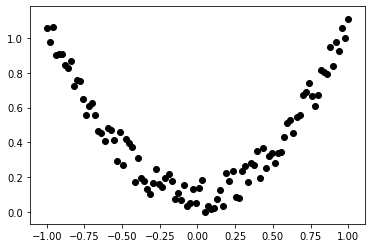

In [5]:
plt.scatter(x,y,c='black')

平均绝对值误差： 0.050989492028765716
平均平方误差： 0.003430192302440401
中位绝对值误差： 0.05219084986808467
R2得分： 0.963773028060943


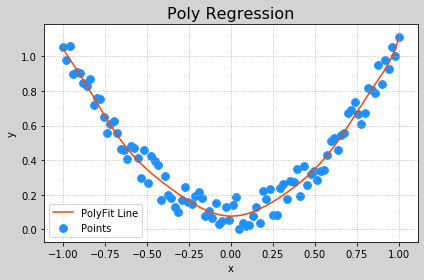

In [6]:
import sklearn.pipeline as pl
import sklearn.linear_model as lm
import sklearn.preprocessing as sp
import matplotlib.pyplot as mp
import numpy as np
import sklearn.metrics as sm

# 采集数据
#x, y = np.loadtxt('./ml_data/single.txt', delimiter=',', usecols=(0, 1), unpack=True)
# 把输入变为二维数组，一行一样本，一列一特征
x = x.reshape(-1, 1)

# 创建模型
model = pl.make_pipeline(
    sp.PolynomialFeatures(10),  # 多项式特征拓展器
    lm.LinearRegression()  # 线性回归器
)
# 训练模型
model.fit(x, y)
# 求预测值y
pred_y = model.predict(x)

# 模型评估
print('平均绝对值误差：', sm.mean_absolute_error(y, pred_y))
print('平均平方误差：', sm.mean_squared_error(y, pred_y))
print('中位绝对值误差：', sm.median_absolute_error(y, pred_y))
print('R2得分：', sm.r2_score(y, pred_y))

# 绘制多项式回归线
px = np.linspace(x.min(), x.max(), 1000)
px = px.reshape(-1, 1)
pred_py = model.predict(px)

# 绘制图像
mp.figure("Poly Regression", facecolor='lightgray')
mp.title('Poly Regression', fontsize=16)
mp.tick_params(labelsize=10)
mp.grid(linestyle=':')
mp.xlabel('x')
mp.ylabel('y')

mp.scatter(x, y, s=60, marker='o', c='dodgerblue', label='Points')
mp.plot(px, pred_py, c='orangered', label='PolyFit Line')
mp.tight_layout()
mp.legend()
mp.show()
